# Google Cloud & NCAA® ML Competition 2018-Men's

Kaggle Competition Notebook by Alex Herring, Ely Liu, Matthew Prout, Steve Yang

## Business Understanding
***

Business Understanding writeup here...





## Data Understanding
***

Data Understanding writeup here...

### EDA

EDA writeup here...

In [ ]:
### EDA Analysis Here


The following command must be run outside of the IPython shell:

    $ pip install matplotlib

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


## Data Preparation / Feature Engineering
***

Data Preparation writeup here...

In [36]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2 as pg

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Modeling - Approach 1
***

Approach 1 Explanation Here...

### Pull Features from PostgreSQL

Pull data from PostgreSQL and pickle to work offline.

In [5]:
# query = '''
#     SELECT *
#     FROM prod.features
#     WHERE "Season Type" = 'NCAA Tourney' and
#         holdout_s2 = 0
# '''

# conn = pg.connect(database='postgres',
#                   user='postgres',
#                   password='w207final',
#                   host='35.185.225.167')

# df = pd.read_sql_query(query, conn)

# # "Diff" Features
# df['AvgRankDiff'] = df['AvgRank'] - df['OpponentAvgRank']
# df['AvgNetPointsForDiff'] = df['AvgNetPointsFor'] - df['OpponentAvgNetPointsFor']
# df['TwoPointPctDiff'] = df['TwoPointPct_Team'] - df['TwoPointPct_Opponent']
# df['ThreePointPctDiff'] = df['ThreePointPct_Team'] - df['ThreePointPct_Opponent']
# df['FreeThrowPctDiff'] = df['FreeThrowPct_Team'] - df['FreeThrowPct_Opponent']
# df['OffensiveReboundsDiff'] = df['OffensiveRebounds_Team'] - df['OffensiveRebounds_Opponent']
# df['DefensiveReboundsDiff'] = df['DefensiveRebounds_Team'] - df['DefensiveRebounds_Opponent']
# df['FieldGoalPctDiff'] = df['FieldGoalPct_Team'] - df['FieldGoalPct_Opponent']
# df['TwoPointAttPctDiff'] = df['TwoPointAttPct_Team'] - df['TwoPointAttPct_Opponent']
# df['ThreePointAttPctDiff'] = df['ThreePointAttPct_Team'] - df['ThreePointAttPct_Opponent']
# df['FieldGoalAttDiff'] = df['FieldGoalAtt_Team'] - df['FieldGoalAtt_Opponent']
# df['TwoPointAttDiff'] = df['TwoPointAtt_Team'] - df['TwoPointAtt_Opponent']
# df['ThreePointAttDiff'] = df['ThreePointAtt_Team'] - df['ThreePointAtt_Opponent']
# df['FreeThrowAttDiff'] = df['FreeThrowAtt_Team'] - df['FreeThrowAtt_Opponent']
# df['AssistsDiff'] = df['Assists_Team'] - df['Assists_Opponent']
# df['TurnoversDiff'] = df['Turnovers_Team'] - df['Turnovers_Opponent']
# df['StealsDiff'] = df['Steals_Team'] - df['Steals_Opponent']
# df['BlocksDiff'] = df['Blocks_Team'] - df['Blocks_Opponent']
# df['PersonalFoulsDiff'] = df['PersonalFouls_Team'] - df['PersonalFouls_Opponent']

# # df.to_pickle("./modeling_df")

In [6]:
df_in = pd.read_pickle("./modeling_df")

In [7]:
df_train = df_in[df_in['holdout_s1'] == 0]
df_test = df_in[df_in['holdout_s1'] == 1]

### Baseline Metrics

- Log Loss value for all predicted probabilites == 0.5
- Log Loss value if every prediction was wrong with 100% confidence

In [6]:
target = 'Outcome'

# baseline of 0.5
baseline = np.full(536, 0.5)
print("Baseline: ",log_loss(df_test[target],baseline))

# worst case scenario -- every prediction was wrong with 100% confidence
print("Completely Wrong: ",log_loss(df_test[target],1-df_test[target]))

Baseline:  0.69314718056
Completely Wrong:  34.5391761936


In [9]:
target = 'Outcome'
features = ['SeedDiff']

lr = LogisticRegression()
lr.fit(df_train[features], df_train[target])
pred = lr.predict(df_test[features])
probs = lr.predict_proba(df_test[features])

print(classification_report(df_test[target], pred))
print("Log Loss: ",log_loss(df_test[target], probs[:,1]))
print("RMSE: ",mean_squared_error(df_test[target], probs[:,1]))
print("ROC AUC: ", roc_auc_score(df_test[target], probs[:,1]))

             precision    recall  f1-score   support

          0       0.69      0.75      0.72       268
          1       0.73      0.67      0.70       268

avg / total       0.71      0.71      0.71       536

Log Loss:  0.571490292973
RMSE:  0.196131801918
ROC AUC:  0.770981844509


### Logistic Regression

In [10]:
target = 'Outcome'
features = ['SeedDiff',
            'WinPct', 'OpponentWinPct',
            'AvgNetPointsFor', 'OpponentAvgNetPointsFor',
            'AvgRank', 'OpponentAvgRank', 
            'TwoPointPct_Team', 'TwoPointPct_Opponent',
            'ThreePointPct_Team', 'ThreePointPct_Opponent',
            'FreeThrowPct_Team', 'FreeThrowPct_Opponent',
            'OffensiveRebounds_Team', 'OffensiveRebounds_Opponent',
            'DefensiveRebounds_Team', 'DefensiveRebounds_Opponent'
           ]

lr = LogisticRegression(penalty='l2')
lr.fit(df_train[features], df_train[target])
pred = lr.predict(df_test[features])
probs = lr.predict_proba(df_test[features])

print(classification_report(df_test[target], pred))
print("Log Loss: ",log_loss(df_test[target], probs[:,1]))
print("RMSE: ",mean_squared_error(df_test[target], probs[:,1]))
print("ROC AUC: ", roc_auc_score(df_test[target], probs[:,1]))

             precision    recall  f1-score   support

          0       0.72      0.72      0.72       268
          1       0.72      0.72      0.72       268

avg / total       0.72      0.72      0.72       536

Log Loss:  0.543489397983
RMSE:  0.184835817665
ROC AUC:  0.79476219648


In [11]:
for i in zip(features, lr.coef_.flatten()):
    print("{:<30} {:>8.4f}".format(i[0],i[1]))

SeedDiff                        -0.0710
WinPct                          -0.4431
OpponentWinPct                   0.4431
AvgNetPointsFor                  0.0889
OpponentAvgNetPointsFor         -0.0889
AvgRank                         -0.0117
OpponentAvgRank                  0.0117
TwoPointPct_Team                 0.1310
TwoPointPct_Opponent            -0.1310
ThreePointPct_Team              -0.7000
ThreePointPct_Opponent           0.7000
FreeThrowPct_Team                0.4025
FreeThrowPct_Opponent           -0.4025
OffensiveRebounds_Team           0.0694
OffensiveRebounds_Opponent      -0.0694
DefensiveRebounds_Team          -0.0913
DefensiveRebounds_Opponent       0.0913


#### "Diff" Features

In [12]:
target = 'Outcome'
features = ['SeedDiff',
            'WinPctDiff',
            'AvgNetPointsForDiff',
            'AvgRankDiff', 
            'TwoPointPctDiff',
            'ThreePointPctDiff',
            'FreeThrowPctDiff',
            'OffensiveReboundsDiff',
            'DefensiveReboundsDiff'
           ]

lr = LogisticRegression(penalty='l2')
lr.fit(df_train[features], df_train[target])
pred = lr.predict(df_test[features])
probs = lr.predict_proba(df_test[features])

print(classification_report(df_test[target], pred))
print("Log Loss: ",log_loss(df_test[target], probs[:,1]))
print("RMSE: ",mean_squared_error(df_test[target], probs[:,1]))
print("ROC AUC: ", roc_auc_score(df_test[target], probs[:,1]))

             precision    recall  f1-score   support

          0       0.72      0.72      0.72       268
          1       0.72      0.72      0.72       268

avg / total       0.72      0.72      0.72       536

Log Loss:  0.543233504514
RMSE:  0.184737569885
ROC AUC:  0.794664736021


In [13]:
for i in zip(features, lr.coef_.flatten()):
    print("{:<30} {:>8.4f}".format(i[0],i[1]))

SeedDiff                        -0.0719
WinPctDiff                      -0.6195
AvgNetPointsForDiff              0.0931
AvgRankDiff                     -0.0116
TwoPointPctDiff                  0.2425
ThreePointPctDiff               -1.2849
FreeThrowPctDiff                 0.6975
OffensiveReboundsDiff            0.0687
DefensiveReboundsDiff           -0.0914


#### Normalized Features

In [14]:
target = 'Outcome'
features = ['SeedDiff',
            'WinPctDiff',
            'AvgNetPointsForDiff',
            'AvgRankDiff', 
            'TwoPointPctDiff',
            'ThreePointPctDiff',
            'FreeThrowPctDiff',
            'OffensiveReboundsDiff',
            'DefensiveReboundsDiff'
           ]

# fit means/std
ss = StandardScaler()
ss.fit(df_train[features])

lr = LogisticRegression(penalty='l2')
lr.fit(ss.transform(df_train[features]), df_train[target])
pred = lr.predict(ss.transform(df_test[features]))
probs = lr.predict_proba(ss.transform(df_test[features]))

print(classification_report(df_test[target], pred))
print("Log Loss: ",log_loss(df_test[target], probs[:,1]))
print("RMSE: ",mean_squared_error(df_test[target], probs[:,1]))
print("ROC AUC: ", roc_auc_score(df_test[target], probs[:,1]))

             precision    recall  f1-score   support

          0       0.74      0.74      0.74       268
          1       0.74      0.74      0.74       268

avg / total       0.74      0.74      0.74       536

Log Loss:  0.546836443034
RMSE:  0.186142864184
ROC AUC:  0.79089162397


In [15]:
for i in zip(features, lr.coef_.flatten()):
    print("{:<30} {:>8.4f}".format(i[0],i[1]))

SeedDiff                        -0.5855
WinPctDiff                      -0.1711
AvgNetPointsForDiff              0.7110
AvgRankDiff                     -0.6650
TwoPointPctDiff                  0.0590
ThreePointPctDiff               -0.2500
FreeThrowPctDiff                 0.1308
OffensiveReboundsDiff            0.1473
DefensiveReboundsDiff           -0.2275


#### Normalized - More Features

In [119]:
target = 'Outcome'
features = ['AvgRank', 'OpponentAvgRank', 'TwoPointPct_Team',
            'ThreePointPct_Team', 'FreeThrowPct_Team', 'OffensiveRebounds_Team',
            'DefensiveRebounds_Team', 'TwoPointPct_Opponent',
            'ThreePointPct_Opponent', 'FreeThrowPct_Opponent',
            'OffensiveRebounds_Opponent', 'DefensiveRebounds_Opponent', 'WinPct',
            'OpponentWinPct', 'WinPctDiff', 'AvgPointsFor', 'AvgPointsAgainst',
            'AvgNetPointsFor', 'SeedDiff', 'OpponentAvgPointsFor',
            'OpponentAvgPointsAgainst', 'OpponentAvgNetPointsFor', 'TourWins',
            'OpponentTourWins', 'TourWinsDiff', 'FieldGoalPct_Team', 'TwoPointAttPct_Team',
            'ThreePointAttPct_Team', 'FieldGoalAtt_Team', 'TwoPointAtt_Team',
            'ThreePointAtt_Team', 'FreeThrowAtt_Team', 'Assists_Team',
            'Turnovers_Team', 'Steals_Team', 'Blocks_Team', 'PersonalFouls_Team',
            'FieldGoalPct_Opponent', 'TwoPointAttPct_Opponent',
            'ThreePointAttPct_Opponent', 'FieldGoalAtt_Opponent',
            'TwoPointAtt_Opponent', 'ThreePointAtt_Opponent',
            'FreeThrowAtt_Opponent', 'Assists_Opponent', 'Turnovers_Opponent',
            'Steals_Opponent', 'Blocks_Opponent', 'PersonalFouls_Opponent',
            'AvgRankDiff', 'AvgNetPointsForDiff', 'TwoPointPctDiff',
            'ThreePointPctDiff', 'FreeThrowPctDiff', 'OffensiveReboundsDiff',
            'DefensiveReboundsDiff', 'FieldGoalPctDiff', 'TwoPointAttPctDiff',
            'ThreePointAttPctDiff', 'FieldGoalAttDiff', 'TwoPointAttDiff',
            'ThreePointAttDiff', 'FreeThrowAttDiff', 'AssistsDiff', 'TurnoversDiff',
            'StealsDiff', 'BlocksDiff', 'PersonalFoulsDiff']

# fit means/std
ss = StandardScaler()
ss.fit(df_train[features])

lr = LogisticRegression(penalty='l2')
lr.fit(ss.transform(df_train[features]), df_train[target])
pred = lr.predict(ss.transform(df_test[features]))
probs = lr.predict_proba(ss.transform(df_test[features]))

print(classification_report(df_test[target], pred))
print("Log Loss: ",log_loss(df_test[target], probs[:,1]))
print("RMSE: ",mean_squared_error(df_test[target], probs[:,1]))
print("ROC AUC: ", roc_auc_score(df_test[target], probs[:,1]))

             precision    recall  f1-score   support

          0       0.76      0.76      0.76       268
          1       0.76      0.76      0.76       268

avg / total       0.76      0.76      0.76       536

Log Loss:  0.529461957644
RMSE:  0.178672013288
ROC AUC:  0.808810425485


In [104]:
for i in zip(features, lr.coef_.flatten()):
    print("{:<30} {:>8.4f}".format(i[0],i[1]))

AvgRank                         -0.2347
OpponentAvgRank                  0.2347
TwoPointPct_Team                -0.2031
ThreePointPct_Team              -0.1757
FreeThrowPct_Team                0.0851
OffensiveRebounds_Team           0.0831
DefensiveRebounds_Team          -0.0673
TwoPointPct_Opponent             0.2031
ThreePointPct_Opponent           0.1757
FreeThrowPct_Opponent           -0.0851
OffensiveRebounds_Opponent      -0.0831
DefensiveRebounds_Opponent       0.0673
WinPct                          -0.0497
OpponentWinPct                   0.0497
WinPctDiff                      -0.0697
AvgPointsFor                    -0.1325
AvgPointsAgainst                -0.2457
AvgNetPointsFor                  0.0908
SeedDiff                        -0.5601
OpponentAvgPointsFor             0.1325
OpponentAvgPointsAgainst         0.2457
OpponentAvgNetPointsFor         -0.0908
TourWins                         0.0428
OpponentTourWins                -0.0428
TourWinsDiff                     0.0595


### PCA + Logistic Regression

Transform features into the principal component space

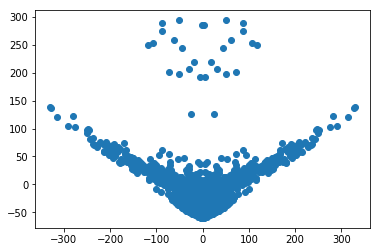

In [54]:
target = 'Outcome'
features = ['AvgRank', 'OpponentAvgRank', 'TwoPointPct_Team',
            'ThreePointPct_Team', 'FreeThrowPct_Team', 'OffensiveRebounds_Team',
            'DefensiveRebounds_Team', 'TwoPointPct_Opponent',
            'ThreePointPct_Opponent', 'FreeThrowPct_Opponent',
            'OffensiveRebounds_Opponent', 'DefensiveRebounds_Opponent', 'WinPct',
            'OpponentWinPct', 'WinPctDiff', 'AvgPointsFor', 'AvgPointsAgainst',
            'AvgNetPointsFor', 'SeedDiff', 'OpponentAvgPointsFor',
            'OpponentAvgPointsAgainst', 'OpponentAvgNetPointsFor', 'TourWins',
            'OpponentTourWins', 'TourWinsDiff', 'FieldGoalPct_Team', 'TwoPointAttPct_Team',
            'ThreePointAttPct_Team', 'FieldGoalAtt_Team', 'TwoPointAtt_Team',
            'ThreePointAtt_Team', 'FreeThrowAtt_Team', 'Assists_Team',
            'Turnovers_Team', 'Steals_Team', 'Blocks_Team', 'PersonalFouls_Team',
            'FieldGoalPct_Opponent', 'TwoPointAttPct_Opponent',
            'ThreePointAttPct_Opponent', 'FieldGoalAtt_Opponent',
            'TwoPointAtt_Opponent', 'ThreePointAtt_Opponent',
            'FreeThrowAtt_Opponent', 'Assists_Opponent', 'Turnovers_Opponent',
            'Steals_Opponent', 'Blocks_Opponent', 'PersonalFouls_Opponent',
            'AvgRankDiff', 'AvgNetPointsForDiff', 'TwoPointPctDiff',
            'ThreePointPctDiff', 'FreeThrowPctDiff', 'OffensiveReboundsDiff',
            'DefensiveReboundsDiff', 'FieldGoalPctDiff', 'TwoPointAttPctDiff',
            'ThreePointAttPctDiff', 'FieldGoalAttDiff', 'TwoPointAttDiff',
            'ThreePointAttDiff', 'FreeThrowAttDiff', 'AssistsDiff', 'TurnoversDiff',
            'StealsDiff', 'BlocksDiff', 'PersonalFoulsDiff']

pca = PCA()
X_train_tr = pca.fit_transform(df_train[features])
X_test_tr = pca.transform(df_test[features])

plt.scatter(X_train_tr[:,0], X_train_tr[:,1])

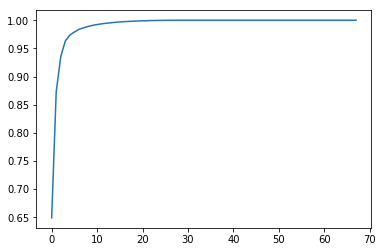

In [58]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [67]:
lr = LogisticRegression(penalty='l2')
lr.fit(X_train_tr[:, :10], df_train[target])
pred = lr.predict(X_test_tr[:, :10])
probs = lr.predict_proba(X_test_tr[:, :10])

print(classification_report(df_test[target], pred))
print("Log Loss: ",log_loss(df_test[target], probs[:,1]))
print("RMSE: ",mean_squared_error(df_test[target], probs[:,1]))
print("ROC AUC: ", roc_auc_score(df_test[target], probs[:,1]))

             precision    recall  f1-score   support

          0       0.72      0.72      0.72       268
          1       0.72      0.72      0.72       268

avg / total       0.72      0.72      0.72       536

Log Loss:  0.530938704189
RMSE:  0.17980356067
ROC AUC:  0.804939852974


### Naive Bayes

In [16]:
target = 'Outcome'
features = ['SeedDiff', 'WinPctDiff', 'AvgNetPointsFor',
            'AvgRank', 'OpponentAvgRank', 
            'TwoPointPct_Team', 'TwoPointPct_Opponent',
            'ThreePointPct_Team', 'ThreePointPct_Opponent',
            'FreeThrowPct_Team', 'FreeThrowPct_Opponent',
            'OffensiveRebounds_Team', 'OffensiveRebounds_Opponent',
            'DefensiveRebounds_Team', 'DefensiveRebounds_Opponent'
           ]

nb = GaussianNB()
nb.fit(df_train[features], df_train[target])

pred = nb.predict(df_test[features])
probs = nb.predict_proba(df_test[features])

print(classification_report(df_test[target], pred))
print("Log Loss: ",log_loss(df_test[target], probs[:,1]))
print("RMSE: ",mean_squared_error(df_test[target], probs[:,1]))
print("ROC AUC: ", roc_auc_score(df_test[target], probs[:,1]))

             precision    recall  f1-score   support

          0       0.71      0.70      0.71       268
          1       0.70      0.71      0.71       268

avg / total       0.71      0.71      0.71       536

Log Loss:  0.885715789799
RMSE:  0.228028843688
ROC AUC:  0.763728001782


### Tree-Based Algorithms

In [17]:
target = 'Outcome'
features = ['SeedDiff', 'WinPct', 'OpponentWinPct', 'AvgNetPointsFor',
            'AvgRank', 'OpponentAvgRank', 
            'TwoPointPct_Team', 'TwoPointPct_Opponent',
            'ThreePointPct_Team', 'ThreePointPct_Opponent',
            'FreeThrowPct_Team', 'FreeThrowPct_Opponent',
            'OffensiveRebounds_Team', 'OffensiveRebounds_Opponent',
            'DefensiveRebounds_Team', 'DefensiveRebounds_Opponent'
           ]

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(df_train[features], df_train[target])

pred = dt.predict(df_test[features])
probs = dt.predict_proba(df_test[features])

print(classification_report(df_test[target], pred))
print("Log Loss: ",log_loss(df_test[target], probs[:,1]))
print("RMSE: ",mean_squared_error(df_test[target], probs[:,1]))
print("ROC AUC: ", roc_auc_score(df_test[target], probs[:,1]))

             precision    recall  f1-score   support

          0       0.64      0.70      0.67       268
          1       0.67      0.61      0.64       268

avg / total       0.66      0.66      0.66       536

Log Loss:  0.616227641986
RMSE:  0.211838082143
ROC AUC:  0.727417019381


#### More Features Added

In [72]:
target = 'Outcome'
features = ['AvgRank', 'OpponentAvgRank', 'TwoPointPct_Team',
            'ThreePointPct_Team', 'FreeThrowPct_Team', 'OffensiveRebounds_Team',
            'DefensiveRebounds_Team', 'TwoPointPct_Opponent',
            'ThreePointPct_Opponent', 'FreeThrowPct_Opponent',
            'OffensiveRebounds_Opponent', 'DefensiveRebounds_Opponent', 'WinPct',
            'OpponentWinPct', 'WinPctDiff', 'AvgPointsFor', 'AvgPointsAgainst',
            'AvgNetPointsFor', 'SeedDiff', 'OpponentAvgPointsFor',
            'OpponentAvgPointsAgainst', 'OpponentAvgNetPointsFor', 'TourWins',
            'OpponentTourWins', 'TourWinsDiff', 'FieldGoalPct_Team', 'TwoPointAttPct_Team',
            'ThreePointAttPct_Team', 'FieldGoalAtt_Team', 'TwoPointAtt_Team',
            'ThreePointAtt_Team', 'FreeThrowAtt_Team', 'Assists_Team',
            'Turnovers_Team', 'Steals_Team', 'Blocks_Team', 'PersonalFouls_Team',
            'FieldGoalPct_Opponent', 'TwoPointAttPct_Opponent',
            'ThreePointAttPct_Opponent', 'FieldGoalAtt_Opponent',
            'TwoPointAtt_Opponent', 'ThreePointAtt_Opponent',
            'FreeThrowAtt_Opponent', 'Assists_Opponent', 'Turnovers_Opponent',
            'Steals_Opponent', 'Blocks_Opponent', 'PersonalFouls_Opponent',
            'AvgRankDiff', 'AvgNetPointsForDiff', 'TwoPointPctDiff',
            'ThreePointPctDiff', 'FreeThrowPctDiff', 'OffensiveReboundsDiff',
            'DefensiveReboundsDiff', 'FieldGoalPctDiff', 'TwoPointAttPctDiff',
            'ThreePointAttPctDiff', 'FieldGoalAttDiff', 'TwoPointAttDiff',
            'ThreePointAttDiff', 'FreeThrowAttDiff', 'AssistsDiff', 'TurnoversDiff',
            'StealsDiff', 'BlocksDiff', 'PersonalFoulsDiff']

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(df_train[features], df_train[target])

pred = dt.predict(df_test[features])
probs = dt.predict_proba(df_test[features])

print(classification_report(df_test[target], pred))
print("Log Loss: ",log_loss(df_test[target], probs[:,1]))
print("RMSE: ",mean_squared_error(df_test[target], probs[:,1]))
print("ROC AUC: ", roc_auc_score(df_test[target], probs[:,1]))

             precision    recall  f1-score   support

          0       0.70      0.73      0.72       268
          1       0.72      0.69      0.70       268

avg / total       0.71      0.71      0.71       536

Log Loss:  0.578984099098
RMSE:  0.196410857092
ROC AUC:  0.770759077746


#### Random Forest

In [99]:
target = 'Outcome'
features = ['AvgRank', 'OpponentAvgRank', 'TwoPointPct_Team',
            'ThreePointPct_Team', 'FreeThrowPct_Team', 'OffensiveRebounds_Team',
            'DefensiveRebounds_Team', 'TwoPointPct_Opponent',
            'ThreePointPct_Opponent', 'FreeThrowPct_Opponent',
            'OffensiveRebounds_Opponent', 'DefensiveRebounds_Opponent', 'WinPct',
            'OpponentWinPct', 'WinPctDiff', 'AvgPointsFor', 'AvgPointsAgainst',
            'AvgNetPointsFor', 'SeedDiff', 'OpponentAvgPointsFor',
            'OpponentAvgPointsAgainst', 'OpponentAvgNetPointsFor', 'TourWins',
            'OpponentTourWins', 'TourWinsDiff', 'FieldGoalPct_Team', 'TwoPointAttPct_Team',
            'ThreePointAttPct_Team', 'FieldGoalAtt_Team', 'TwoPointAtt_Team',
            'ThreePointAtt_Team', 'FreeThrowAtt_Team', 'Assists_Team',
            'Turnovers_Team', 'Steals_Team', 'Blocks_Team', 'PersonalFouls_Team',
            'FieldGoalPct_Opponent', 'TwoPointAttPct_Opponent',
            'ThreePointAttPct_Opponent', 'FieldGoalAtt_Opponent',
            'TwoPointAtt_Opponent', 'ThreePointAtt_Opponent',
            'FreeThrowAtt_Opponent', 'Assists_Opponent', 'Turnovers_Opponent',
            'Steals_Opponent', 'Blocks_Opponent', 'PersonalFouls_Opponent',
            'AvgRankDiff', 'AvgNetPointsForDiff', 'TwoPointPctDiff',
            'ThreePointPctDiff', 'FreeThrowPctDiff', 'OffensiveReboundsDiff',
            'DefensiveReboundsDiff', 'FieldGoalPctDiff', 'TwoPointAttPctDiff',
            'ThreePointAttPctDiff', 'FieldGoalAttDiff', 'TwoPointAttDiff',
            'ThreePointAttDiff', 'FreeThrowAttDiff', 'AssistsDiff', 'TurnoversDiff',
            'StealsDiff', 'BlocksDiff', 'PersonalFoulsDiff']

rf = RandomForestClassifier(n_estimators=300)
rf.fit(df_train[features], df_train[target])

pred = rf.predict(df_test[features])
probs = rf.predict_proba(df_test[features])

print(classification_report(df_test[target], pred))
print("Log Loss: ",log_loss(df_test[target], probs[:,1]))
print("RMSE: ",mean_squared_error(df_test[target], probs[:,1]))
print("ROC AUC: ", roc_auc_score(df_test[target], probs[:,1]))

             precision    recall  f1-score   support

          0       0.72      0.70      0.71       268
          1       0.71      0.72      0.71       268

avg / total       0.71      0.71      0.71       536

Log Loss:  0.563940802025
RMSE:  0.192789676617
ROC AUC:  0.775952327913


### PCA + Random Forest

In [97]:
target = 'Outcome'
features = ['AvgRank', 'OpponentAvgRank', 'TwoPointPct_Team',
            'ThreePointPct_Team', 'FreeThrowPct_Team', 'OffensiveRebounds_Team',
            'DefensiveRebounds_Team', 'TwoPointPct_Opponent',
            'ThreePointPct_Opponent', 'FreeThrowPct_Opponent',
            'OffensiveRebounds_Opponent', 'DefensiveRebounds_Opponent', 'WinPct',
            'OpponentWinPct', 'WinPctDiff', 'AvgPointsFor', 'AvgPointsAgainst',
            'AvgNetPointsFor', 'SeedDiff', 'OpponentAvgPointsFor',
            'OpponentAvgPointsAgainst', 'OpponentAvgNetPointsFor', 'TourWins',
            'OpponentTourWins', 'TourWinsDiff', 'FieldGoalPct_Team', 'TwoPointAttPct_Team',
            'ThreePointAttPct_Team', 'FieldGoalAtt_Team', 'TwoPointAtt_Team',
            'ThreePointAtt_Team', 'FreeThrowAtt_Team', 'Assists_Team',
            'Turnovers_Team', 'Steals_Team', 'Blocks_Team', 'PersonalFouls_Team',
            'FieldGoalPct_Opponent', 'TwoPointAttPct_Opponent',
            'ThreePointAttPct_Opponent', 'FieldGoalAtt_Opponent',
            'TwoPointAtt_Opponent', 'ThreePointAtt_Opponent',
            'FreeThrowAtt_Opponent', 'Assists_Opponent', 'Turnovers_Opponent',
            'Steals_Opponent', 'Blocks_Opponent', 'PersonalFouls_Opponent',
            'AvgRankDiff', 'AvgNetPointsForDiff', 'TwoPointPctDiff',
            'ThreePointPctDiff', 'FreeThrowPctDiff', 'OffensiveReboundsDiff',
            'DefensiveReboundsDiff', 'FieldGoalPctDiff', 'TwoPointAttPctDiff',
            'ThreePointAttPctDiff', 'FieldGoalAttDiff', 'TwoPointAttDiff',
            'ThreePointAttDiff', 'FreeThrowAttDiff', 'AssistsDiff', 'TurnoversDiff',
            'StealsDiff', 'BlocksDiff', 'PersonalFoulsDiff']

pca = PCA()
X_train_tr = pca.fit_transform(df_train[features])
X_test_tr = pca.transform(df_test[features])

In [98]:
rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train_tr, df_train[target])

pred = rf.predict(X_test_tr)
probs = rf.predict_proba(X_test_tr)

print(classification_report(df_test[target], pred))
print("Log Loss: ",log_loss(df_test[target], probs[:,1]))
print("RMSE: ",mean_squared_error(df_test[target], probs[:,1]))
print("ROC AUC: ", roc_auc_score(df_test[target], probs[:,1]))

             precision    recall  f1-score   support

          0       0.71      0.71      0.71       268
          1       0.71      0.71      0.71       268

avg / total       0.71      0.71      0.71       536

Log Loss:  0.596266592015
RMSE:  0.203523611111
ROC AUC:  0.768705446647


## Modeling - Approach 2
***

The second approach to training and tuning the models is using the data from the regular season to train the model, and using the tournament data to tune the model.  An assumption with this approach is that we are treating the match up between regular season games and tournament games the same.

This approach has boths pros and cons.  One of the benefits to this approach is that many more observations to train from using the regular season games between 2003-2018 (82041) than just relying on the tournament games between 2003-2013 (713).  There are also daily rankings of division 1 teams provided by Massey Ratings which are apt for training with regular season games, although the ranking from the last regular season game can still be used with approach 1.  One of the main disadvantages to using approach 2 is that it cannot train on the tournament seed information, which is only available prior to the tournament.

Note that there are also variations for approach 2 that should be explored.  One variation is to use all the regular season games as training data, and all the tournament games as tuning data.  A second variation is to use the tournament data prior to 2014 with the regular season data for training, and the tournament data between 2014-2017 for tuning, similar to approach 1.  Both of these variations are examined below.

### Pull Features from PostgreSQL

Pull data from PostgreSQL and pickle to work offline.

In [6]:
conn = pg.connect(database='postgres',
                  user='postgres',
                  password='w207final',
                  host='35.185.225.167')

### Get the train/dev data from the database

#### Approach2: Training data is all regular season data (2003-2018)

In [7]:
approach2TrainingDataQuery = '''  SELECT * FROM prod."features" f WHERE (f."Season Type"='Regular') AND (f."Season" < 2019) ORDER BY "Season", "DayNum", "Team"  '''
df_approach2_training = pd.read_sql_query(approach2TrainingDataQuery, conn)

#### Approach2: Dev data is all tournament data (2003-2017)

In [8]:
approach2DevDataQuery = ''' SELECT * FROM prod."features" f WHERE (f."Season Type"='NCAA Tourney') AND (f."Season" > 2002) AND (f."Season" < 2018) order by "Season", "DayNum", "Team" '''
df_approach2_dev = pd.read_sql_query(approach2DevDataQuery, conn)

#### Approach2 Combined: Training data is all regular season data (2003-2018) and the tournament games before 2014 (2003-2013)

In [9]:
approach2CombinedTrainingDataQuery = '''  SELECT * FROM prod."features" f WHERE (f."Season Type"='Regular') OR (f."Season" < 2014) ORDER BY "Season", "DayNum", "Team"  '''
df_approach2Combined_training = pd.read_sql_query(approach2CombinedTrainingDataQuery, conn)

#### Approach2 Combined: Dev data is tournament data between 2014-2017

In [10]:
approach2CombinedDevDataQuery = ''' SELECT * FROM prod."features" f WHERE (f."Season Type"='NCAA Tourney') AND (f."Season" > 2013) AND (f."Season" < 2018) order by "Season", "DayNum", "Team" '''
df_approach2Combined_dev = pd.read_sql_query(approach2CombinedDevDataQuery, conn)

In [11]:
conn.close()

### Remove NaNs

In [12]:
columnsToClean = ['Outcome', 'AvgRank', 'OpponentAvgRank', 'TwoPointPct_Team', 'ThreePointPct_Team', 'FreeThrowPct_Team', 'OffensiveRebounds_Team', 'DefensiveRebounds_Team', 'TwoPointPct_Opponent', 'ThreePointPct_Opponent', 'FreeThrowPct_Opponent', 'OffensiveRebounds_Opponent', 'DefensiveRebounds_Opponent', 'WinPct', 'OpponentWinPct', 'WinPctDiff', 'AvgPointsFor', 'AvgPointsAgainst', 'AvgNetPointsFor', 'OpponentAvgPointsFor', 'OpponentAvgPointsAgainst', 'OpponentAvgNetPointsFor', 'TourWins', 'OpponentTourWins', 'TourWinsDiff', 'FieldGoalPct_Team', 'TwoPointAttPct_Team', 'ThreePointAttPct_Team', 'FieldGoalAtt_Team', 'TwoPointAtt_Team', 'ThreePointAtt_Team', 'FreeThrowAtt_Team', 'Assists_Team', 'Turnovers_Team', 'Steals_Team', 'Blocks_Team', 'PersonalFouls_Team', 'FieldGoalPct_Opponent', 'TwoPointAttPct_Opponent', 'ThreePointAttPct_Opponent', 'FieldGoalAtt_Opponent', 'TwoPointAtt_Opponent', 'ThreePointAtt_Opponent', 'FreeThrowAtt_Opponent', 'Assists_Opponent', 'Turnovers_Opponent', 'Steals_Opponent', 'Blocks_Opponent', 'PersonalFouls_Opponent']
df_approach2_training.dropna(how='any', inplace=True, subset=columnsToClean)
df_approach2_dev.dropna(how='any', inplace=True, subset=columnsToClean)
df_approach2Combined_training.dropna(how='any', inplace=True, subset=columnsToClean)
df_approach2Combined_dev.dropna(how='any', inplace=True, subset=columnsToClean)

### Create Train and Dev Sets

In [13]:
target = 'Outcome'
features = ['AvgRank', 'OpponentAvgRank', 'TwoPointPct_Team', 'ThreePointPct_Team', 'FreeThrowPct_Team', 'OffensiveRebounds_Team', 'DefensiveRebounds_Team', 'TwoPointPct_Opponent', 'ThreePointPct_Opponent', 'FreeThrowPct_Opponent', 'OffensiveRebounds_Opponent', 'DefensiveRebounds_Opponent', 'WinPct', 'OpponentWinPct', 'WinPctDiff', 'AvgPointsFor', 'AvgPointsAgainst', 'AvgNetPointsFor', 'OpponentAvgPointsFor', 'OpponentAvgPointsAgainst', 'OpponentAvgNetPointsFor', 'TourWins', 'OpponentTourWins', 'TourWinsDiff', 'FieldGoalPct_Team', 'TwoPointAttPct_Team', 'ThreePointAttPct_Team', 'FieldGoalAtt_Team', 'TwoPointAtt_Team', 'ThreePointAtt_Team', 'FreeThrowAtt_Team', 'Assists_Team', 'Turnovers_Team', 'Steals_Team', 'Blocks_Team', 'PersonalFouls_Team', 'FieldGoalPct_Opponent', 'TwoPointAttPct_Opponent', 'ThreePointAttPct_Opponent', 'FieldGoalAtt_Opponent', 'TwoPointAtt_Opponent', 'ThreePointAtt_Opponent', 'FreeThrowAtt_Opponent', 'Assists_Opponent', 'Turnovers_Opponent', 'Steals_Opponent', 'Blocks_Opponent', 'PersonalFouls_Opponent']

In [14]:
X_train2 = df_approach2_training[features]
y_train2 = df_approach2_training[target]
X_dev2  = df_approach2_dev[features]
y_dev2  = df_approach2_dev[target]

In [15]:
X_train2_combined = df_approach2Combined_training[features]
y_train2_combined = df_approach2Combined_training[target]
X_dev2_combined  = df_approach2Combined_dev[features]
y_dev2_combined  = df_approach2Combined_dev[target]

#### Perform a Logistic Regression (Lasso) Using the **Regular Season**

In [18]:
lrc1 = LogisticRegression(penalty='l1')
params = {'C': [50,75,100,125,150,175,200,225]}
gscv1 = GridSearchCV(lrc1, params, scoring='neg_log_loss', refit=True)
gscv1.fit(X_train2, y_train2)
print('Best log-loss: {:.4}, with best C: {}'.format(gscv1.best_score_, gscv1.best_params_['C']))
lrc1 = LogisticRegression(penalty='l1', C=gscv1.best_params_['C'])
lrc1.fit(X_train2, y_train2)
prediction1 = lrc1.predict(X_dev2)
y_probas = lrc1.predict_proba(X_dev2)

Best log-loss: -0.5518, with best C: 100


In [28]:
# Determine F1 score
print(classification_report(prediction1, y_dev2))
# Determine AUC
print('Area under the curve: {0:.3f}'.format(roc_auc_score(y_dev2,  lrc1.predict(X_dev2))))
# Determine log-loss
print('Log loss: {}'.format(log_loss(y_dev2.values, y_probas[:,1])))
# Determine RMSE
print('RMSE: {}'.format(mean_squared_error(y_dev2.values, y_probas[:,1])))

             precision    recall  f1-score   support

          0       0.73      0.73      0.73       982
          1       0.73      0.73      0.73       980

avg / total       0.73      0.73      0.73      1962

Area under the curve: 0.727
Log loss: 0.547507555038823
RMSE: 0.18511282645243243


#### Perform a Logistic Regression (Ridge) Using the **Regular Season**

In [29]:
lrc2 = LogisticRegression(penalty='l2')
params = {'C': [50,75,100,125,150,175,200,225]}
gscv2 = GridSearchCV(lrc2, params, scoring='neg_log_loss', refit=True)
gscv2.fit(X_train2, y_train2)
print('Best log-loss: {:.4}, with best C: {}'.format(gscv2.best_score_, gscv2.best_params_['C']))
lrc2 = LogisticRegression(penalty='l2', C=gscv2.best_params_['C'])
lrc2.fit(X_train2, y_train2)
prediction2 = lrc2.predict(X_dev2)
y_probas = lrc2.predict_proba(X_dev2)

Best log-loss: -0.5518, with best C: 75


In [30]:
# Determine F1 score
print(classification_report(prediction2, y_dev2))
# Determine AUC
print('Area under the curve: {0:.3f}'.format(roc_auc_score(y_dev2,  lrc2.predict(X_dev2))))
# Determine log-loss
print('Log loss: {}'.format(log_loss(y_dev2.values, y_probas[:,1])))
# Determine RMSE
print('RMSE: {}'.format(mean_squared_error(y_dev2.values, y_probas[:,1])))

             precision    recall  f1-score   support

          0       0.73      0.73      0.73       981
          1       0.73      0.73      0.73       981

avg / total       0.73      0.73      0.73      1962

Area under the curve: 0.730
Log loss: 0.5476144232872374
RMSE: 0.18517487195042445


#### Perform a Logistic Regression (Lasso) Using **Combined Regular Season / Tournament Data**

In [31]:
lrc3 = LogisticRegression(penalty='l1')
params = {'C': [50,75,100,125,150,175,200,225]}
gscv3 = GridSearchCV(lrc3, params, scoring='neg_log_loss', refit=True)
gscv3.fit(X_train2_combined, y_train2_combined)
print('Best log-loss: {:.4}, with best C: {}'.format(gscv3.best_score_, gscv3.best_params_['C']))
lrc3 = LogisticRegression(penalty='l1', C=gscv3.best_params_['C'])
lrc3.fit(X_train2_combined, y_train2_combined)
prediction3 = lrc3.predict(X_dev2_combined)
y_probas = lrc3.predict_proba(X_dev2_combined)

Best log-loss: -0.5518, with best C: 100


In [32]:
# Determine F1 score
print(classification_report(prediction3, y_dev2_combined))
# Determine AUC
print('Area under the curve: {0:.3f}'.format(roc_auc_score(y_dev2,  lrc3.predict(X_dev2))))
# Determine log-loss
print('Log loss: {}'.format(log_loss(y_dev2_combined.values, y_probas[:,1])))
# Determine RMSE
print('RMSE: {}'.format(mean_squared_error(y_dev2_combined.values, y_probas[:,1])))

             precision    recall  f1-score   support

          0       0.74      0.74      0.74       268
          1       0.74      0.74      0.74       268

avg / total       0.74      0.74      0.74       536

Area under the curve: 0.728
Log loss: 0.5367589196086237
RMSE: 0.18026256901739407


#### Perform a Logistic Regression (Ridge) Using **Combined Regular Season / Tournament Data**

In [33]:
lrc4 = LogisticRegression(penalty='l2')
params = {'C': [50,75,100,125,150,175,200,225]}
gscv4 = GridSearchCV(lrc4, params, scoring='neg_log_loss', refit=True)
gscv4.fit(X_train2_combined, y_train2_combined)
print('Best log-loss: {:.4}, with best C: {}'.format(gscv4.best_score_, gscv4.best_params_['C']))
lrc4 = LogisticRegression(penalty='l2', C=gscv4.best_params_['C'])
lrc4.fit(X_train2_combined, y_train2_combined)
prediction4 = lrc4.predict(X_dev2_combined)

Best log-loss: -0.5518, with best C: 50


In [34]:
# Determine F1 score
print(classification_report(prediction4, y_dev2_combined))
# Determine AUC
print('Area under the curve: {0:.3f}'.format(roc_auc_score(y_dev2,  lrc4.predict(X_dev2))))
# Determine log-loss
print('Log loss: {}'.format(log_loss(y_dev2_combined.values, y_probas[:,1])))
# Determine RMSE
print('RMSE: {}'.format(mean_squared_error(y_dev2_combined.values, y_probas[:,1])))

             precision    recall  f1-score   support

          0       0.74      0.74      0.74       268
          1       0.74      0.74      0.74       268

avg / total       0.74      0.74      0.74       536

Area under the curve: 0.730
Log loss: 0.5367589196086237
RMSE: 0.18026256901739407


### Best Data Set and Regularization

Based on the above models, the best results are from training a logistic regression model using a combination of regular season and tournament games (2003-2013), and using ridge regression (L2) for regularization.

## Model Ensemble
***

Combining Approach 1 & 2 explanation here...

In [12]:
### Model Ensemble Analysis Here...

## Final Model Evaluation (2018 Tournament)
***

In [ ]:
### Model Eval Here

## Model Deployment
***

- Create prediction output of all possible games
- Submit CSV to Kaggle

In [ ]:
### prediction output code here...